# Week 5 C
### Name: Jay Zhang

To solve the question: "What's the relationship between the KIT gene and Testicular Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [16]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Testicular_Cancer_(TGCT)/TCGA.TGCT.sampleMap_TGCT_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Testicular_Cancer_(TGCT)/TCGA.TGCT.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [17]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,bilateral_diagnosis_timing_type,...,_GENOMIC_ID_TCGA_TGCT_gistic2,_GENOMIC_ID_data/public/TCGA/TGCT/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_TGCT_gistic2thd,_GENOMIC_ID_TCGA_TGCT_mutation_bcm_gene,_GENOMIC_ID_TCGA_TGCT_miRNA_HiSeq,_GENOMIC_ID_TCGA_TGCT_mutation_broad_gene,_GENOMIC_ID_TCGA_TGCT_PDMRNAseq,_GENOMIC_ID_TCGA_TGCT_RPPA,_GENOMIC_ID_TCGA_TGCT_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_TGCT_mutation_bcgsc_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,TCGA-2G-AAEW-01,TCGA-2G-AAEW,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,31.0,NaN,TCGA-2G-AAEW,TCGA-2G-AAEW-01A,NaN,...,TCGA-2G-AAEW-01A-11D-A42X-01,TCGA-2G-AAEW-01,TCGA-2G-AAEW-01A-11D-A42X-01,TCGA-2G-AAEW-01A-11D-A42Y-10,TCGA-2G-AAEW-01,TCGA-2G-AAEW-01A-11D-A42Y-10,TCGA-2G-AAEW-01,6A193988-A18D-4D18-914F-763613095313,09302c4e-1f97-4f55-a46e-dfbfb4403629,TCGA-2G-AAEW-01A-11D-A42Y-10
TCGA-2G-AAEX-01,TCGA-2G-AAEX-01,TCGA-2G-AAEX,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,38.0,TCGA-2G-AAEX-F68735,TCGA-2G-AAEX,TCGA-2G-AAEX-01A,NaN,...,TCGA-2G-AAEX-01A-11D-A42X-01,TCGA-2G-AAEX-01,TCGA-2G-AAEX-01A-11D-A42X-01,TCGA-2G-AAEX-01A-11D-A42Y-10,TCGA-2G-AAEX-01,TCGA-2G-AAEX-01A-11D-A42Y-10,TCGA-2G-AAEX-01,F7B402D0-EA57-4EF4-B685-BD9B1E763BB1,d3bc1c64-7a91-44b9-9060-1785dc0d42be,TCGA-2G-AAEX-01A-11D-A42Y-10
TCGA-2G-AAF1-01,TCGA-2G-AAF1-01,TCGA-2G-AAF1,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,28.0,TCGA-2G-AAF1-F69858,TCGA-2G-AAF1,TCGA-2G-AAF1-01A,NaN,...,TCGA-2G-AAF1-01A-11D-A42X-01,TCGA-2G-AAF1-01,TCGA-2G-AAF1-01A-11D-A42X-01,TCGA-2G-AAF1-01A-11D-A42Y-10,TCGA-2G-AAF1-01,TCGA-2G-AAF1-01A-11D-A42Y-10,TCGA-2G-AAF1-01,519C1C72-9BC5-46CE-90A9-07FAC96049F2,cbb214e1-ea22-4231-815b-d27d585e61c3,TCGA-2G-AAF1-01A-11D-A42Y-10
TCGA-2G-AAF4-01,TCGA-2G-AAF4-01,TCGA-2G-AAF4,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,30.0,TCGA-2G-AAF4-F66653,TCGA-2G-AAF4,TCGA-2G-AAF4-01A,NaN,...,TCGA-2G-AAF4-01A-11D-A42X-01,TCGA-2G-AAF4-01,TCGA-2G-AAF4-01A-11D-A42X-01,TCGA-2G-AAF4-01A-11D-A42Y-10,TCGA-2G-AAF4-01,TCGA-2G-AAF4-01A-11D-A42Y-10,TCGA-2G-AAF4-01,B72BFEBF-F25B-4239-8076-C0C86D02B80D,48b3878b-e75f-4aec-b92a-590bdd006d4a,TCGA-2G-AAF4-01A-11D-A42Y-10
TCGA-2G-AAF6-01,TCGA-2G-AAF6-01,TCGA-2G-AAF6,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,28.0,TCGA-2G-AAF6-F68859,TCGA-2G-AAF6,TCGA-2G-AAF6-01A,NaN,...,TCGA-2G-AAF6-01A-11D-A42X-01,TCGA-2G-AAF6-01,TCGA-2G-AAF6-01A-11D-A42X-01,TCGA-2G-AAF6-01A-11D-A42Y-10,TCGA-2G-AAF6-01,TCGA-2G-AAF6-01A-11D-A42Y-10,TCGA-2G-AAF6-01,A4538CA9-9E09-461E-B007-80FCC271E6F1,6e8e0cf4-134a-419b-aa8c-3ce1b8a9115a,TCGA-2G-AAF6-01A-11D-A42Y-10


In [18]:
# Display gene dataset
gene_data.head()

,TCGA-2G-AAHP-01,TCGA-4K-AAAL-01,TCGA-2G-AALP-01,TCGA-2G-AAGI-05,TCGA-ZM-AA0N-01,TCGA-2G-AAGI-01,TCGA-2G-AALT-01,TCGA-2G-AAKO-01,TCGA-2G-AAFG-01,TCGA-2G-AAG6-01,...,TCGA-2G-AAKG-05,TCGA-2G-AAG9-01,TCGA-XE-AANR-01,TCGA-YU-A94I-01,TCGA-2G-AAFO-01,TCGA-2G-AALR-01,TCGA-SN-A84X-01,TCGA-XE-A8H5-01,TCGA-XE-AAOD-01,TCGA-2G-AAHT-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-1.064292,-0.550492,-0.357592,-2.170992,-1.099292,0.287308,1.117908,-1.294892,-0.312792,0.377908,...,-1.620992,-0.223592,-1.464992,-0.650692,-0.680692,0.141308,0.086308,-1.450792,-1.183792,-0.825592
HIF3A,2.004674,2.885874,3.188374,1.747974,1.870874,5.475574,4.570574,0.672174,0.712774,4.982474,...,1.884474,2.449574,1.259574,2.959974,1.472474,4.936574,4.065074,1.933374,1.659474,0.928274
RNF17,1.875265,9.089365,0.116965,9.729765,9.669065,0.576865,-0.531035,9.999865,9.417865,-0.531035,...,2.382765,9.357565,9.222665,-0.531035,7.320565,0.316965,3.934365,9.994165,8.364465,9.605365
RNF10,-0.002472,0.790228,0.375328,0.640328,0.777128,-0.097272,-0.082872,0.591028,-0.105672,0.197328,...,-0.256172,0.515428,0.598928,-0.035872,0.400628,0.221928,0.298228,0.427928,0.438728,0.413928
RNF11,-0.615978,0.056122,-0.587578,0.514822,-0.449078,-0.798378,-0.413378,-0.223078,0.662422,-0.389178,...,-0.825278,0.179822,-0.506078,-0.504578,-0.595578,0.047122,-0.107178,-0.019278,-0.180378,-0.427978


In [19]:
# Set Basic info
gene_fullname = 'KIT gene'
gene = 'kit'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Testicular Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 120 features, and the gene dataset includes 20530 genes


In [20]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,bilateral_diagnosis_timing_type,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,TCGA-2G-AAEW-01,TCGA-2G-AAEW,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,31.0,NaN,TCGA-2G-AAEW,TCGA-2G-AAEW-01A,NaN,...,4.207622,-0.237217,1.597767,0.23401,2.696223,-0.250186,3.097773,-1.468595,-0.043933,0.490788
TCGA-2G-AAEX-01,TCGA-2G-AAEX-01,TCGA-2G-AAEX,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,38.0,TCGA-2G-AAEX-F68735,TCGA-2G-AAEX,TCGA-2G-AAEX-01A,NaN,...,5.504822,0.846083,0.797867,0.02141,2.778623,0.597014,0.329973,-1.447895,1.108067,0.969988
TCGA-2G-AAF1-01,TCGA-2G-AAF1-01,TCGA-2G-AAF1,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,28.0,TCGA-2G-AAF1-F69858,TCGA-2G-AAF1,TCGA-2G-AAF1-01A,NaN,...,4.813122,-0.005417,1.629067,0.64101,2.337123,-0.257086,2.008273,-1.256195,0.153367,0.561388
TCGA-2G-AAF4-01,TCGA-2G-AAF4-01,TCGA-2G-AAF4,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,30.0,TCGA-2G-AAF4-F66653,TCGA-2G-AAF4,TCGA-2G-AAF4-01A,NaN,...,4.213022,2.064083,1.162567,0.53161,3.066823,-1.131686,-0.735627,-1.617995,-0.710533,0.441188
TCGA-2G-AAF6-01,TCGA-2G-AAF6-01,TCGA-2G-AAF6,TCGA Testicular Cancer (TGCT),testicular germ cell tumor,Testis,28.0,TCGA-2G-AAF6-F68859,TCGA-2G-AAF6,TCGA-2G-AAF6-01A,NaN,...,5.124822,1.812383,0.734067,-0.88259,2.702423,-0.184686,-1.043427,-1.584895,-0.367333,0.382488


In [21]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,-11325.0,-1.247192,1.370174,9.255665,0.322728,-0.485378,-0.61291,1.315306,2.923954,-0.423399,...,4.207622,-0.237217,1.597767,0.23401,2.696223,-0.250186,3.097773,-1.468595,-0.043933,0.490788
TCGA-2G-AAEX-01,-13964.0,-1.743692,1.814274,9.680665,0.636028,0.108222,-1.26731,1.206606,3.185254,-0.423399,...,5.504822,0.846083,0.797867,0.02141,2.778623,0.597014,0.329973,-1.447895,1.108067,0.969988
TCGA-2G-AAF1-01,-10511.0,-1.397192,1.187274,9.598765,0.838328,-0.096978,-1.04111,1.560006,2.617554,0.060601,...,4.813122,-0.005417,1.629067,0.64101,2.337123,-0.257086,2.008273,-1.256195,0.153367,0.561388
TCGA-2G-AAF4-01,-10983.0,-0.994992,1.597874,9.971765,0.339728,-0.098878,-1.05091,0.858706,1.188054,0.580601,...,4.213022,2.064083,1.162567,0.53161,3.066823,-1.131686,-0.735627,-1.617995,-0.710533,0.441188
TCGA-2G-AAF6-01,-10281.0,-0.498792,2.274374,8.821565,0.247628,0.408722,-0.65491,1.862706,3.455154,-0.423399,...,5.124822,1.812383,0.734067,-0.88259,2.702423,-0.184686,-1.043427,-1.584895,-0.367333,0.382488


In [22]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Testicular Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,-11325.0,-1.247192,1.370174,9.255665,0.322728,-0.485378,-0.61291,1.315306,2.923954,-0.423399,...,-0.237217,1.597767,0.23401,2.696223,-0.250186,3.097773,-1.468595,-0.043933,0.490788,1
TCGA-2G-AAEX-01,-13964.0,-1.743692,1.814274,9.680665,0.636028,0.108222,-1.26731,1.206606,3.185254,-0.423399,...,0.846083,0.797867,0.02141,2.778623,0.597014,0.329973,-1.447895,1.108067,0.969988,1
TCGA-2G-AAF1-01,-10511.0,-1.397192,1.187274,9.598765,0.838328,-0.096978,-1.04111,1.560006,2.617554,0.060601,...,-0.005417,1.629067,0.64101,2.337123,-0.257086,2.008273,-1.256195,0.153367,0.561388,1
TCGA-2G-AAF4-01,-10983.0,-0.994992,1.597874,9.971765,0.339728,-0.098878,-1.05091,0.858706,1.188054,0.580601,...,2.064083,1.162567,0.53161,3.066823,-1.131686,-0.735627,-1.617995,-0.710533,0.441188,1
TCGA-2G-AAF6-01,-10281.0,-0.498792,2.274374,8.821565,0.247628,0.408722,-0.65491,1.862706,3.455154,-0.423399,...,1.812383,0.734067,-0.88259,2.702423,-0.184686,-1.043427,-1.584895,-0.367333,0.382488,1


In [23]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

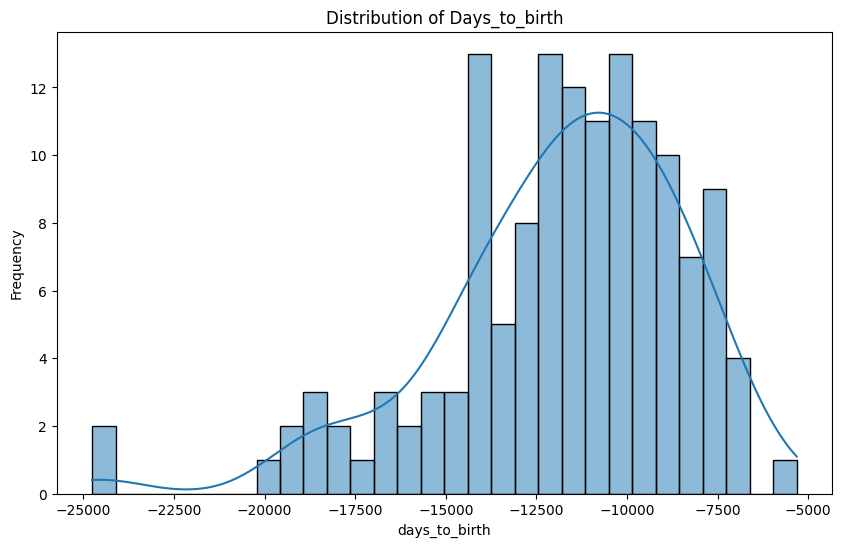

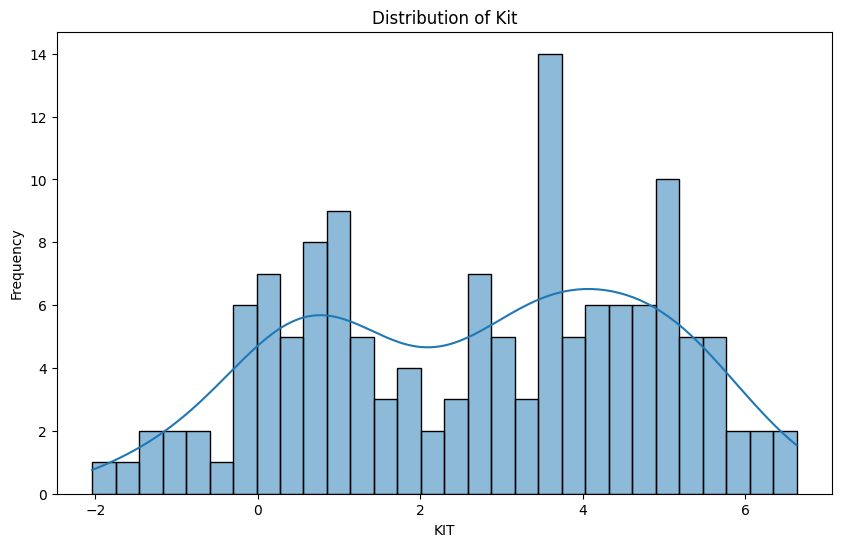

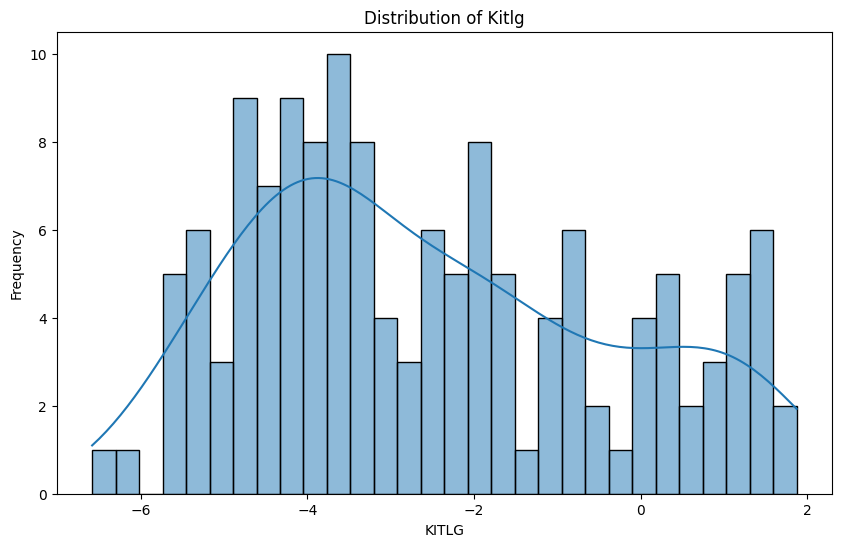

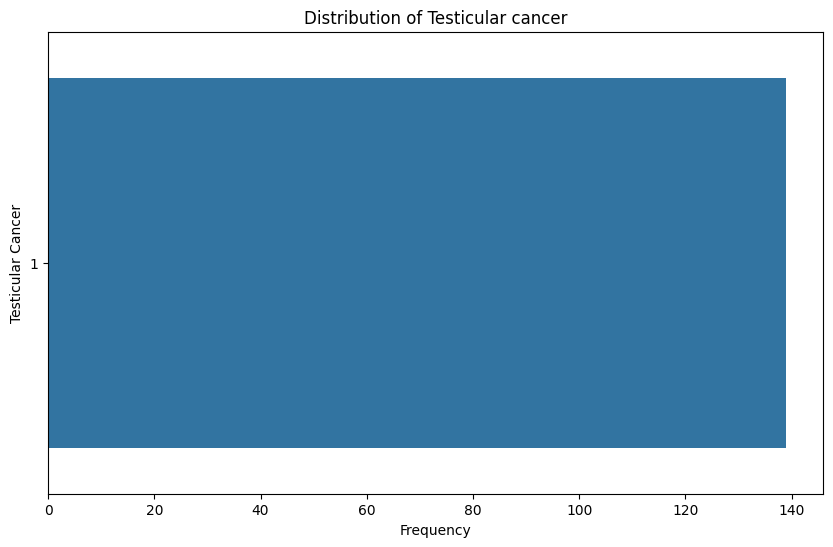

In [24]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [25]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Testicular Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAEW-01,31,-1.247192,1.370174,9.255665,0.322728,-0.485378,-0.61291,1.315306,2.923954,-0.423399,...,-0.237217,1.597767,0.23401,2.696223,-0.250186,3.097773,-1.468595,-0.043933,0.490788,1
TCGA-2G-AAEX-01,38,-1.743692,1.814274,9.680665,0.636028,0.108222,-1.26731,1.206606,3.185254,-0.423399,...,0.846083,0.797867,0.02141,2.778623,0.597014,0.329973,-1.447895,1.108067,0.969988,1
TCGA-2G-AAF1-01,28,-1.397192,1.187274,9.598765,0.838328,-0.096978,-1.04111,1.560006,2.617554,0.060601,...,-0.005417,1.629067,0.64101,2.337123,-0.257086,2.008273,-1.256195,0.153367,0.561388,1
TCGA-2G-AAF4-01,30,-0.994992,1.597874,9.971765,0.339728,-0.098878,-1.05091,0.858706,1.188054,0.580601,...,2.064083,1.162567,0.53161,3.066823,-1.131686,-0.735627,-1.617995,-0.710533,0.441188,1
TCGA-2G-AAF6-01,28,-0.498792,2.274374,8.821565,0.247628,0.408722,-0.65491,1.862706,3.455154,-0.423399,...,1.812383,0.734067,-0.88259,2.702423,-0.184686,-1.043427,-1.584895,-0.367333,0.382488,1


### 3. Do regression & Cross Validation

In [26]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1785/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.9777777777777776


In [27]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For kit:
KIT: Coefficient = 3.0814879110195774e-33, p-value = 1.4778175239068864e-73
KITLG: Coefficient = 0.0, p-value = 1.0

For age:
age: Coefficient = 8.196757843312076e-31, p-value = 3.443633016100589e-21
SAGE1: Coefficient = -2.5637979419682884e-30, p-value = 2.040765192929305e-22
MAGEH1: Coefficient = 1.9721522630525295e-31, p-value = 7.293795143322391e-34
GAGE1: Coefficient = 2.662405555120915e-30, p-value = 1.5042373604852211e-22
GAGE4: Coefficient = -1.836566794967668e-30, p-value = 1.209204327084909e-21
GAGE2D: Coefficient = -8.38164711797325e-31, p-value = 2.0810849707066323e-22
GAGE2E: Coefficient = 0.0, p-value = 1.0
GAGE2C: Coefficient = -4.190823558986625e-31, p-value = 4.831949182931733e-23
MAGED1: Coefficient = 1.7749370367472766e-30, p-value = 3.925578378486885e-21
MAGED2: Coefficient = 9.860761315262648e-31, p-value = 3.2295664353387006e-24
MAGED4: Coefficient = 2.9582283945787943e-31, p-value = 8.010876842379627e-26
MAGEA11: Coefficient = 2.4651

### 4. Discussion

In [28]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between KIT gene and Testicular Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the KIT gene and Testicular Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the KIT gene and Testicular Cancer when considering the influence of age.




In [29]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: KIT
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: KITLG
Coefficient is zero, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: SAGE1
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: MAGEH1
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: GAGE1
Coefficient is positive, and it is statistically significant (p-value < 0.05).

Variable: GAGE4
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: GAGE2D
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: GAGE2E
Coefficient is zero, and it is not statistically significant (p-value >= 0.05).

Variable: GAGE2C
Coefficient is negative, and it is statistically significant (p-value < 0.

In [30]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: KIT
Conclusion: H1 is confirmed: There is an association between the expression of the KIT and Testicular Cancer when considering the influence of age.

Variable: KITLG
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the KITLG gene and Testicular Cancer when considering the influence of age.


